In [5]:
import numpy as np
import matplotlib.pyplot as plt
from src import *
import os
import json

In [28]:
mean_infections = []
ps = []
plist = set()
clist = set()
rlist = set()
beta = []
frac = []


data_dir = "Data/erdos-renyi_experiment/"
for f in os.listdir(data_dir):

    d = f.split(".json")[0].split("-")
    p = float(d[0])
    c = int(d[1])
    r = int(d[2])

    plist.add(p)
    clist.add(c)
    rlist.add(r)

clist = sorted(clist)
plist = sorted(plist)
rlist = sorted(rlist)

c_dict = dict(zip(clist, range(len(clist))))
p_dict = dict(zip(plist, range(len(plist))))
r_dict = dict(zip(rlist, range(len(rlist))))


psmat = np.zeros((len(clist), len(plist), len(rlist)))
spsmat = np.zeros((len(clist), len(plist), len(rlist)))
ipn = np.zeros((len(clist), len(plist), len(rlist)))

for f in os.listdir(data_dir):
    d = f.split(".json")[0].split("-")
    p = float(d[0])
    c = int(d[1])
    r = int(d[2])
    
    i = c_dict[c]
    j = p_dict[p]
    k = r_dict[r]

    fname = os.path.join(data_dir, f)

    with open(fname, "r") as file:
        data = json.loads(file.read())

    x = np.array(data["x"])
    A = np.array(data["A"])
    samples = np.array(data["samples"])

    ipn[i, j, k] = infections_per_node(x)

    psmat[i, j, k] = posterior_similarity(A, samples)
    spsmat[i, j, k] = samplewise_posterior_similarity(A, samples)

Text(0, 0.5, 'PS')

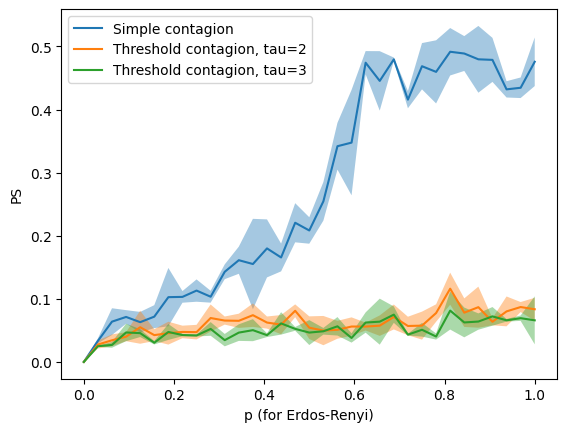

In [33]:
l = ["Simple contagion", "Threshold contagion, tau=2", "Threshold contagion, tau=3"]

for i in c_dict:
    ps_mean = np.mean(psmat, axis=2)[c_dict[i]]
    ps_std = np.std(psmat, axis=2)[c_dict[i]]
    ipn_mean = np.mean(ipn, axis=2)[c_dict[i]]
    plt.plot(plist, ps_mean, label=l[i])
    plt.fill_between(plist, ps_mean - ps_std, ps_mean + ps_std, alpha=0.4)
plt.legend()
plt.xlabel("p (for Erdos-Renyi)")
plt.ylabel("PS")

Text(0, 0.5, 'PS')

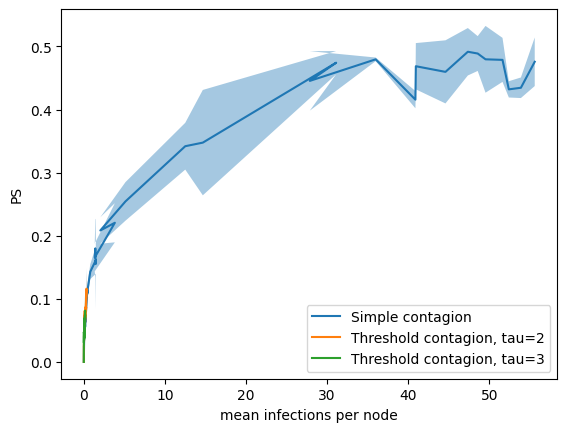

In [35]:
l = ["Simple contagion", "Threshold contagion, tau=2", "Threshold contagion, tau=3"]

for i in c_dict:
    ps_mean = np.mean(psmat, axis=2)[c_dict[i]]
    ps_std = np.std(psmat, axis=2)[c_dict[i]]
    ipn_mean = np.mean(ipn, axis=2)[c_dict[i]]
    plt.plot(ipn_mean, ps_mean, label=l[i])
    plt.fill_between(ipn_mean, ps_mean - ps_std, ps_mean + ps_std, alpha=0.4)
plt.legend()
plt.xlabel("mean infections per node")
plt.ylabel("PS")

Text(0, 0.5, 'PS')

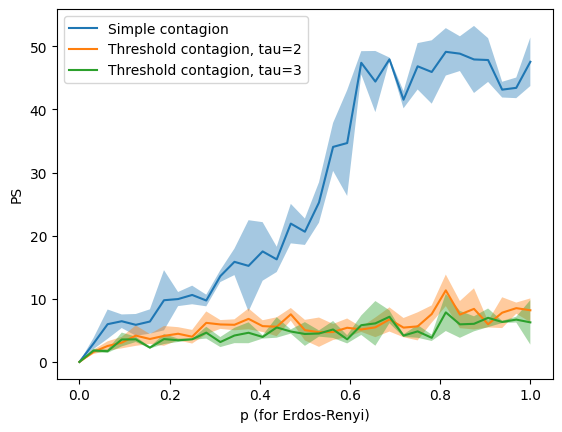

In [24]:
l = ["Simple contagion", "Threshold contagion, tau=2", "Threshold contagion, tau=3"]

for i in c_dict:
    ps_mean = np.mean(spsmat, axis=2)[:, c_dict[i]]
    ps_std = np.std(spsmat, axis=2)[:, c_dict[i]]
    plt.plot(plist, ps_mean, label=l[i])
    plt.fill_between(plist, ps_mean - ps_std, ps_mean + ps_std, alpha=0.4)
plt.legend()
plt.xlabel("p (for Erdos-Renyi)")
plt.ylabel("PS")